# World Exploration

This notebook creates some interesting visualizations.

## Load libraries and DFs

In [1]:
ex <- data.frame('example' = c(1, '1,2,3,4'), 'example2' = c(2,3))

In [2]:
ex

example,example2
<fct>,<dbl>
1,2
"1,2,3,4",3


In [3]:
library(dplyr)
library(ggplot2)
library(ggrepel)
library(scales)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [4]:
#Load data frame
completeDF = read.csv('../../M2/carpentry/completeDF.csv')
head(completeDF, 2)

CountryName,Year,SPURBGROW,SPPOPAG25FEIN,SPPOPAG25MAIN,SPPOPDPND,SPPOPDPNDOL,SPPOPDPNDYG,SPPOPGROW,SPPOPTOTL,⋯,NYGDPFCSTKD,NYGDPFCSTKN,NYTAXNINDCD,SEPRMENRRFE,SEENRPRIMFMZS,SEPRMENRRMA,NVINDMANFKDZG,Continent,Region1,ISO3
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
Albania,1990,2.5430425,29833,30896,61.99491,8.901594,53.09332,1.7990856,3286542,⋯,4687983945,556155415389,456523006,99.68872,1.00459,99.23334,-1.330062,Europe,Southern Europe,ALB
Albania,1991,0.1410606,28894,29109,62.71541,9.191396,53.52401,-0.6028097,3266790,⋯,3484062971,413329164899,559041634,101.44180,1.00398,101.03975,4.437151,Europe,Southern Europe,ALB


In [5]:
#Load correlation dataframe
corrsDF = read.csv('../correlation_analysis/corrsDF.csv')

In [6]:
head(corrsDF, 2)

indicator1,indicator2,correlation
<fct>,<fct>,<dbl>
SPURBGROW,SPPOPAG25FEIN,0.09637276
SPURBGROW,SPPOPAG25MAIN,0.09328798


---

## Exploring high and low SPDYNCBRTIN countries

In [7]:
#Find world population by year for comparison
popbyYear <- completeDF %>% group_by(Year) %>% summarize(SPPOPTOTL=sum(SPPOPTOTL, na.rm=TRUE))

#### ***Find and store mean SPDYNCBRTIN values per year***

In [8]:
mean(completeDF$SPDYNCBRTIN, na.rm=TRUE)

[1] 22.38159

In [9]:
annualSPDYNCBRTINmean <- completeDF %>% group_by(Year) %>% summarize(meanSPDYNCBRTIN = mean(SPDYNCBRTIN, na.rm=TRUE))

### ***High SPDYNCBRTIN***

#### ***Visualize high SPDYNCBRTIN countries compared to mean***

In [10]:
topSPDYNCBRTINcountries <- completeDF %>% group_by(CountryName) %>% 
                                summarise(mean = mean(SPDYNCBRTIN), max=max(SPDYNCBRTIN)) %>% 
                                arrange(desc(mean)) %>% head(9)

In [11]:
topSPDYNCBRTINviz <- completeDF %>% filter(CountryName %in% topSPDYNCBRTINcountries$CountryName) %>% 
                            group_by(CountryName, Year) %>% 
                            summarize(SPDYNCBRTIN = sum(SPDYNCBRTIN, na.rm=TRUE))

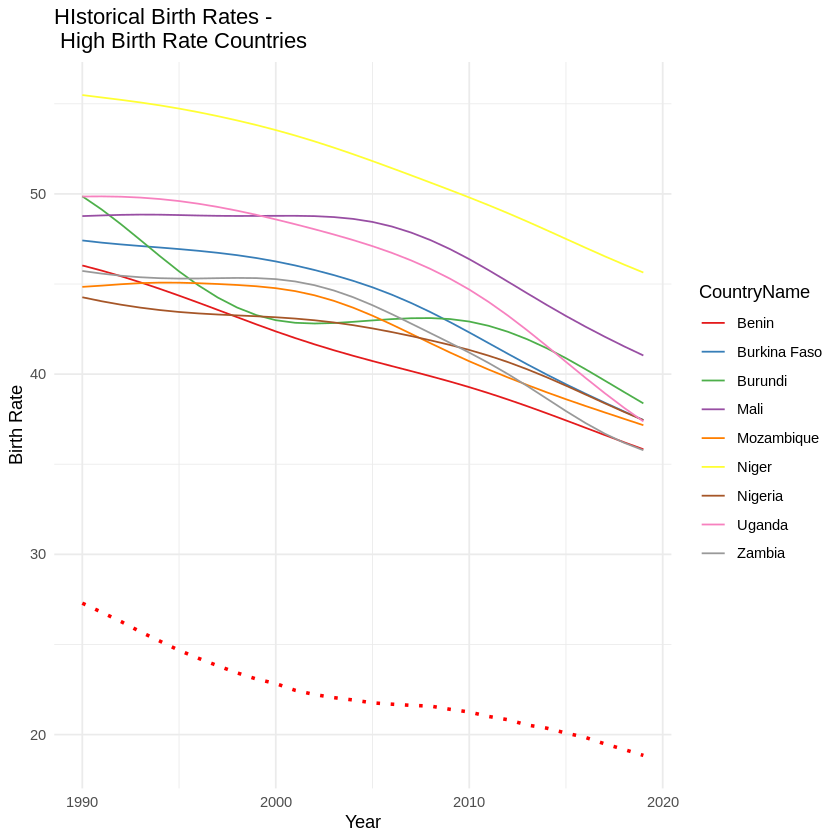

In [12]:
ggplot(topSPDYNCBRTINviz, aes(x=Year, y=SPDYNCBRTIN)) + geom_line(aes(color=CountryName)) + 
            geom_line(data=annualSPDYNCBRTINmean, aes(x=Year, y=meanSPDYNCBRTIN), color='red', size=1, linetype='dotted') + 
            scale_color_brewer(palette='Set1') + ggtitle("HIstorical Birth Rates -\n High Birth Rate Countries") + 
            theme_minimal() + ylab("Birth Rate")

### ***Low SPDYNCBRTIN***

In [13]:
bottomSPDYNCBRTINcountries <- completeDF %>% group_by(CountryName) %>%  
                                summarise(mean = mean(SPDYNCBRTIN, na.rm=TRUE), min=min(SPDYNCBRTIN)) %>% 
                                arrange(desc(mean)) %>% tail(9)

In [14]:
bottomSPDYNCBRTINviz <- completeDF %>% filter(CountryName %in% bottomSPDYNCBRTINcountries$CountryName) %>% 
                            group_by(CountryName, Year) %>% 
                            summarize(SPDYNCBRTIN = sum(SPDYNCBRTIN))

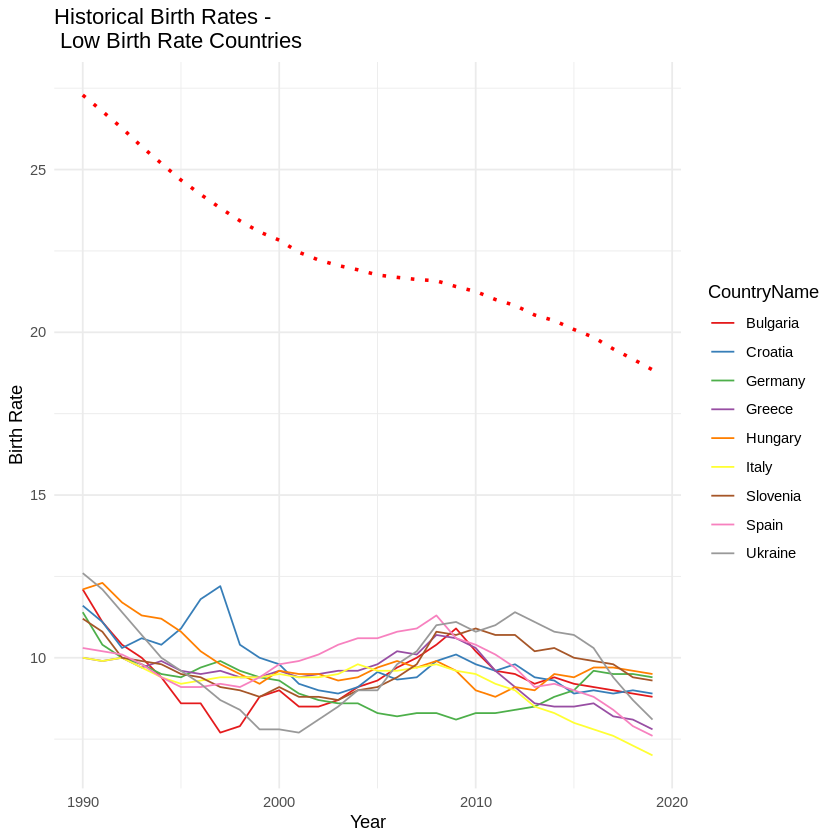

In [15]:
ggplot(bottomSPDYNCBRTINviz, aes(x=Year, y=SPDYNCBRTIN)) + geom_line(aes(color=CountryName)) + 
                        geom_line(data=annualSPDYNCBRTINmean, aes(x=Year, y=meanSPDYNCBRTIN), color='red', size=1, linetype='dotted') +
                        scale_color_brewer(palette='Set1') + ggtitle("Historical Birth Rates -\n Low Birth Rate Countries") + 
                        theme_minimal() + ylab("Birth Rate")

---

### Exploring relationship between births and total population

In [16]:
fertRateByYear <- completeDF %>% group_by(Year) %>% summarize(mean = mean(SPDYNTFRTIN, na.rm=TRUE))

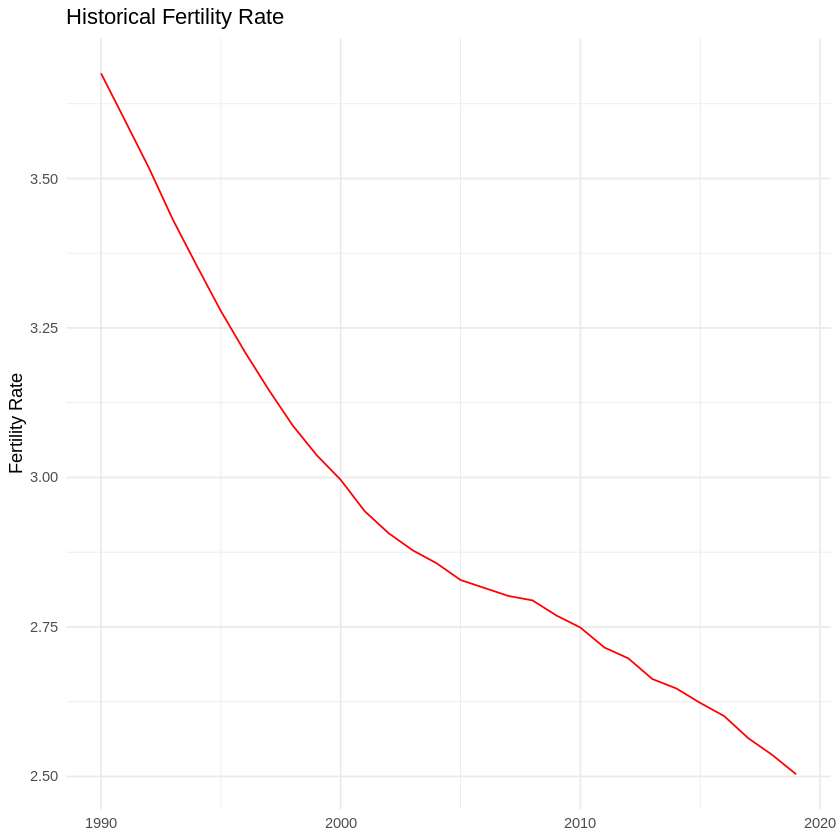

In [17]:
ggplot(fertRateByYear, aes(x=Year, y=mean)) + geom_line(color='red') + theme_minimal() +
    theme(axis.title.x=element_blank()) +
    ggtitle("Historical Fertility Rate") + ylab("Fertility Rate")

### Population Totals by Age Group

In [18]:
#Pop under 4
popUnder4 <- completeDF %>% group_by(Year) %>% 
        summarize(SPPOP0004FE = sum(SPPOP0004FE, na.rm=TRUE), SPPOP0004MA = sum(SPPOP0004MA, na.rm=TRUE)) %>% 
        mutate(POPU4TOT = SPPOP0004FE + SPPOP0004MA) %>% select(Year, POPU4TOT)

#Pop 5-9
pop5to9 <- completeDF %>% group_by(Year) %>% 
        summarize(SPPOP0509FE = sum(SPPOP0509FE, na.rm=TRUE), SPPOP0509MA = sum(SPPOP0509MA, na.rm=TRUE)) %>% 
        mutate(POP0509TOT = SPPOP0509FE + SPPOP0509MA) %>% select(Year, POP0509TOT)

#Pop 10-14
pop10to14 <- completeDF %>% group_by(Year) %>% 
        summarize(SPPOP1014FE = sum(SPPOP1014FE, na.rm=TRUE), SPPOP1014MA = sum(SPPOP1014MA, na.rm=TRUE)) %>% 
        mutate(POP1014TOT = SPPOP1014FE + SPPOP1014MA) %>% select(Year, POP1014TOT)

#Pop 15-19
pop15to19 <- completeDF %>% group_by(Year) %>% 
        summarize(SPPOP1519FE = sum(SPPOP1519FE, na.rm=TRUE), SPPOP1519MA = sum(SPPOP1519MA, na.rm=TRUE)) %>% 
        mutate(POP1519TOT = SPPOP1519FE + SPPOP1519MA) %>% select(Year, POP1519TOT)
#Pop 20-24
pop20to24 <- completeDF %>% group_by(Year) %>% 
        summarize(SPPOP2024FE = sum(SPPOP2024FE, na.rm=TRUE), SPPOP2024MA = sum(SPPOP2024MA, na.rm=TRUE)) %>% 
        mutate(POP2024TOT = SPPOP2024FE + SPPOP2024MA) %>% select(Year, POP2024TOT)
#Pop 25-29
pop25to29 <- completeDF %>% group_by(Year) %>% 
        summarize(SPPOP2529FE = sum(SPPOP2529FE, na.rm=TRUE), SPPOP2529MA = sum(SPPOP2529MA, na.rm=TRUE)) %>% 
        mutate(POP2529TOT = SPPOP2529FE + SPPOP2529MA) %>% select(Year, POP2529TOT)
#Pop 30-34
pop30to34 <- completeDF %>% group_by(Year) %>% 
        summarize(SPPOP3034FE = sum(SPPOP3034FE, na.rm=TRUE), SPPOP3034MA = sum(SPPOP3034MA, na.rm=TRUE)) %>% 
        mutate(POP3034TOT = SPPOP3034FE + SPPOP3034MA) %>% select(Year, POP3034TOT)
#Pop 35-29
pop35to39 <- completeDF %>% group_by(Year) %>% 
        summarize(SPPOP3539FE = sum(SPPOP3539FE, na.rm=TRUE), SPPOP3539MA = sum(SPPOP3539MA, na.rm=TRUE)) %>% 
        mutate(POP3539TOT = SPPOP3539FE + SPPOP3539MA) %>% select(Year, POP3539TOT)
#Pop 40-44
pop40to44 <- completeDF %>% group_by(Year) %>% 
        summarize(SPPOP4044FE = sum(SPPOP4044FE, na.rm=TRUE), SPPOP4044MA = sum(SPPOP4044MA, na.rm=TRUE)) %>% 
        mutate(POP4044TOT = SPPOP4044FE + SPPOP4044MA) %>% select(Year, POP4044TOT)
#Pop 45-49
pop45to49 <- completeDF %>% group_by(Year) %>% 
        summarize(SPPOP4549FE = sum(SPPOP4549FE, na.rm=TRUE), SPPOP4549MA = sum(SPPOP4549MA, na.rm=TRUE)) %>% 
        mutate(POP4549TOT = SPPOP4549FE + SPPOP4549MA) %>% select(Year, POP4549TOT)
#Pop 50-54
pop50to54 <- completeDF %>% group_by(Year) %>% 
        summarize(SPPOP5054FE = sum(SPPOP5054FE, na.rm=TRUE), SPPOP5054MA = sum(SPPOP5054MA, na.rm=TRUE)) %>% 
        mutate(POP5054TOT = SPPOP5054FE + SPPOP5054MA) %>% select(Year, POP5054TOT)
#Pop 55-59
pop55to59 <- completeDF %>% group_by(Year) %>% 
        summarize(SPPOP5559FE = sum(SPPOP5559FE, na.rm=TRUE), SPPOP5559MA = sum(SPPOP5559MA, na.rm=TRUE)) %>% 
        mutate(POP5559TOT = SPPOP5559FE + SPPOP5559MA) %>% select(Year, POP5559TOT)
#Pop 60-64
pop60to64 <- completeDF %>% group_by(Year) %>% 
        summarize(SPPOP6064FE = sum(SPPOP6064FE, na.rm=TRUE), SPPOP6064MA = sum(SPPOP6064MA, na.rm=TRUE)) %>% 
        mutate(POP6064TOT = SPPOP6064FE + SPPOP6064MA) %>% select(Year, POP6064TOT)
#Over 65
popOver65 <- completeDF %>% group_by(Year) %>% 
        summarize(SPPOP65UPFEZS = sum(SPPOP65UPFEZS, na.rm=TRUE), SPPOP65UPMAZS = sum(SPPOP65UPMAZS, na.rm=TRUE)) %>% 
        mutate(POPOVER65 = SPPOP65UPFEZS + SPPOP65UPMAZS) %>% select(Year, POPOVER65)

In [19]:
head(popOver65)

Year,POPOVER65
<dbl>,<dbl>
1990,1431.234
1991,1454.592
1992,1477.566
1993,1499.783
1994,1520.495
1995,1539.369


In [20]:
library(purrr)
library(reshape2)


Attaching package: ‘purrr’

The following object is masked from ‘package:scales’:

    discard



In [21]:
popByAgeGroup <- melt(list(popUnder4, pop5to9, pop10to14, pop15to19, pop20to24, pop25to29, pop30to34, pop35to39,
                     pop40to44, pop45to49, pop50to54, pop55to59, pop60to64, popOver65) %>% 
                     reduce(left_join, by="Year"), id="Year")

head(popByAgeGroup)

Year,variable,value
<dbl>,<fct>,<dbl>
1990,POPU4TOT,566717805
1991,POPU4TOT,571781250
1992,POPU4TOT,567834683
1993,POPU4TOT,558224886
1994,POPU4TOT,547977455
1995,POPU4TOT,540787071


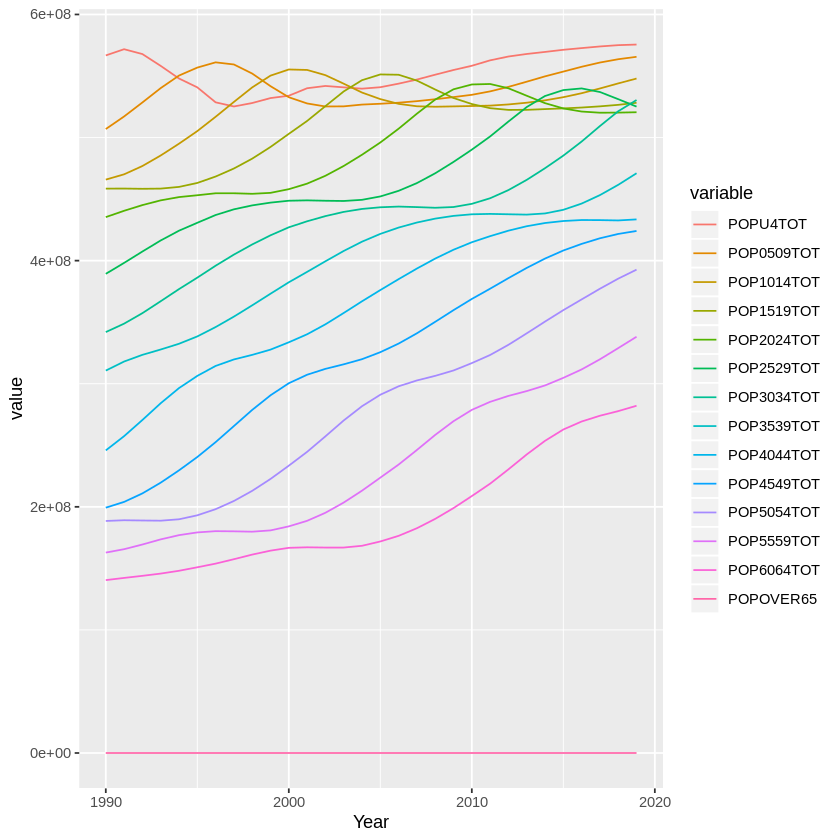

In [22]:
ggplot(popByAgeGroup, aes(x=Year, y=value, group=variable)) + geom_line(aes(color=variable))

In [23]:
### Add Russia for comparison
russiaU4TOTL <- completeDF %>% filter(CountryName == "Russian Federation") %>% group_by(CountryName, Year) %>% 
    summarize(SPPOP0004FE = sum(SPPOP0004FE, na.rm=TRUE), SPPOP0004MA = sum(SPPOP0004MA, na.rm=TRUE)) %>% 
        mutate(POPU4TOT = SPPOP0004FE + SPPOP0004MA) %>% select(Year, POPU4TOT)

Adding missing grouping variables: `CountryName`


In [24]:
head(russiaU4TOTL)

CountryName,Year,POPU4TOT
<fct>,<dbl>,<dbl>
Russian Federation,1990,11554771
Russian Federation,1991,11197937
Russian Federation,1992,10503835
Russian Federation,1993,9616983
Russian Federation,1994,8759452
Russian Federation,1995,8057491


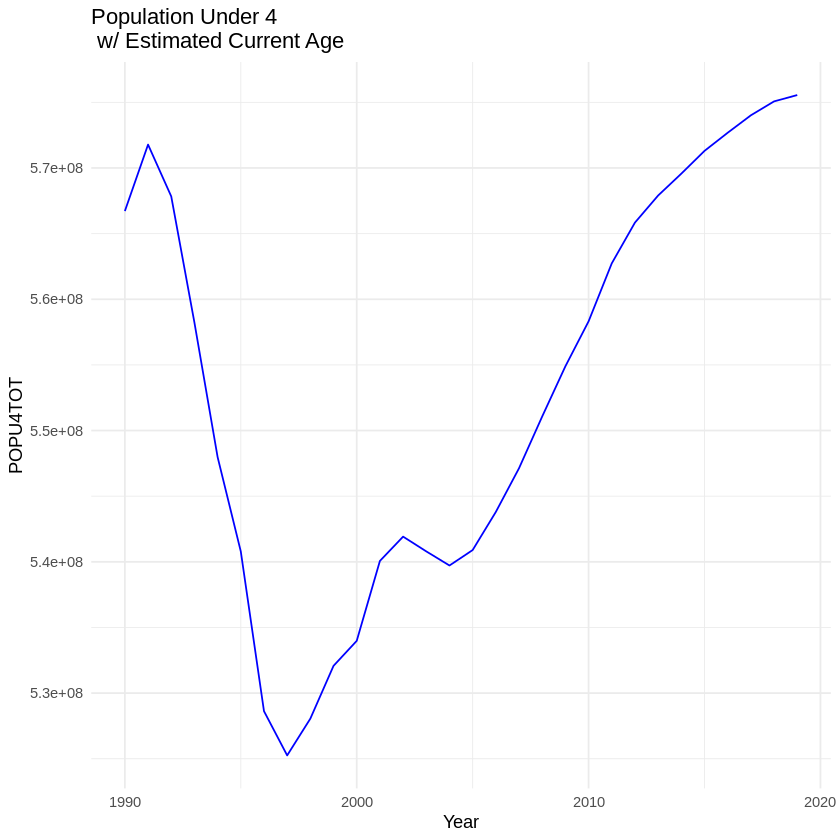

In [25]:
ggplot(popUnder4, aes(x=Year, y=POPU4TOT, label=(2021-Year))) + geom_line(color='blue') + 
    #geom_text(position=position_nudge(y=5000000), size=3) +
    ggtitle("Population Under 4 \n w/ Estimated Current Age") + theme_minimal()

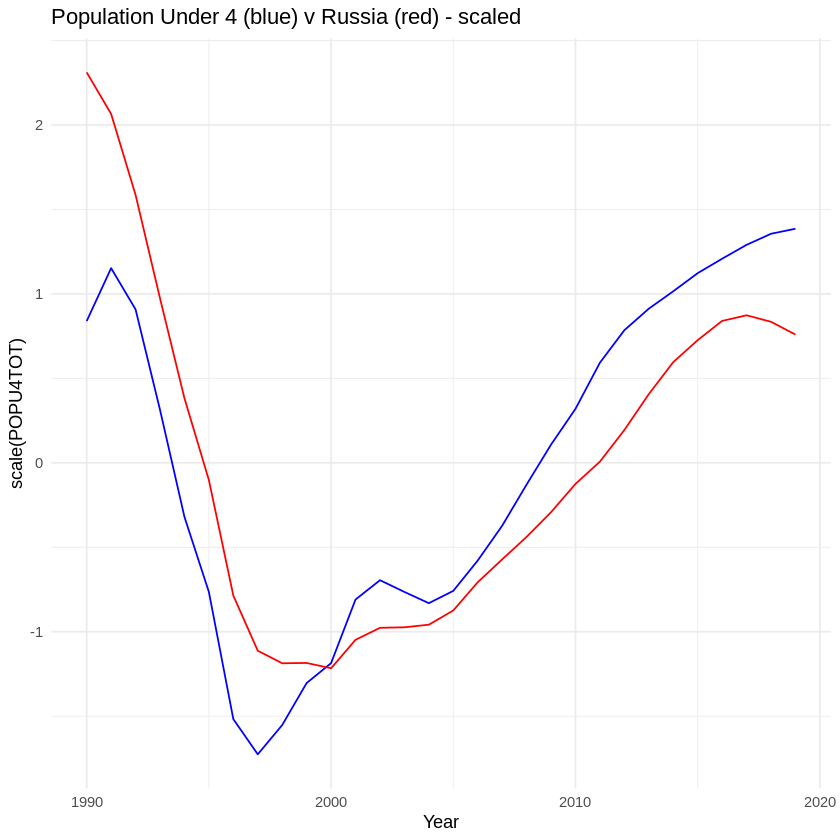

In [26]:
ggplot(popUnder4, aes(x=Year, y=scale(POPU4TOT))) + geom_line(color='blue') + 
    geom_line(data=russiaU4TOTL, aes(x=Year, y=scale(POPU4TOT)), color='red') + 
    ggtitle("Population Under 4 (blue) v Russia (red) - scaled") + theme_minimal()

### Comparing Population over 65 to Population Under 4

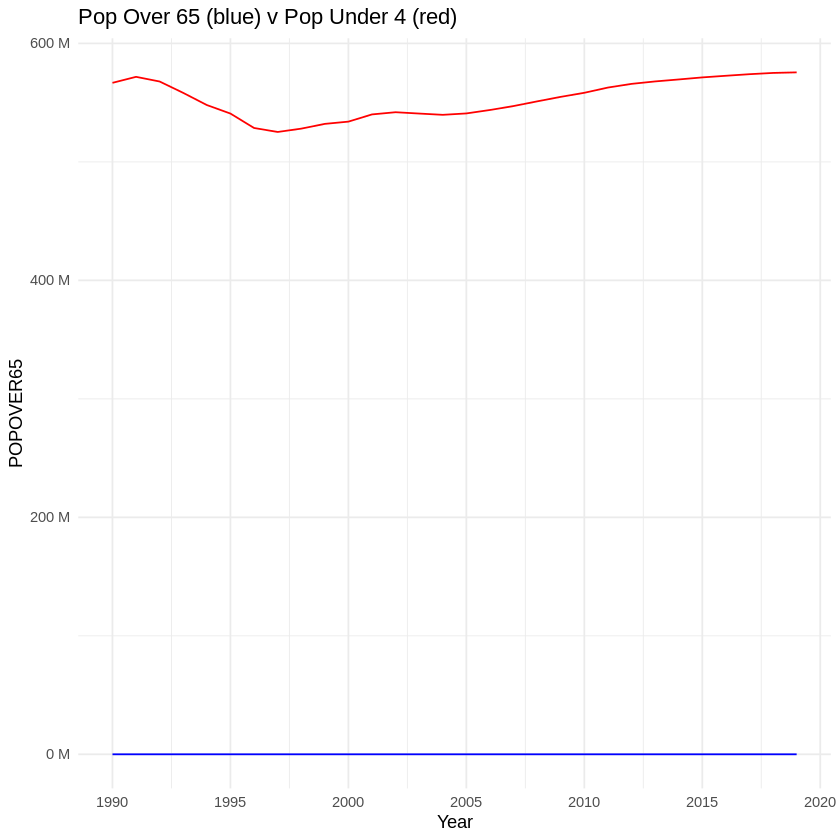

In [27]:
ggplot(popOver65, aes(x=Year, y=POPOVER65)) + geom_line(color='blue') + 
        geom_line(data=popUnder4, aes(x=Year, y=POPU4TOT), color='red') + 
        ggtitle("Pop Over 65 (blue) v Pop Under 4 (red)") + 
        scale_y_continuous(labels=unit_format(scale=1e-6, unit='M')) + 
        scale_x_continuous(breaks=seq(1970, 2020, 5)) + theme_minimal() 

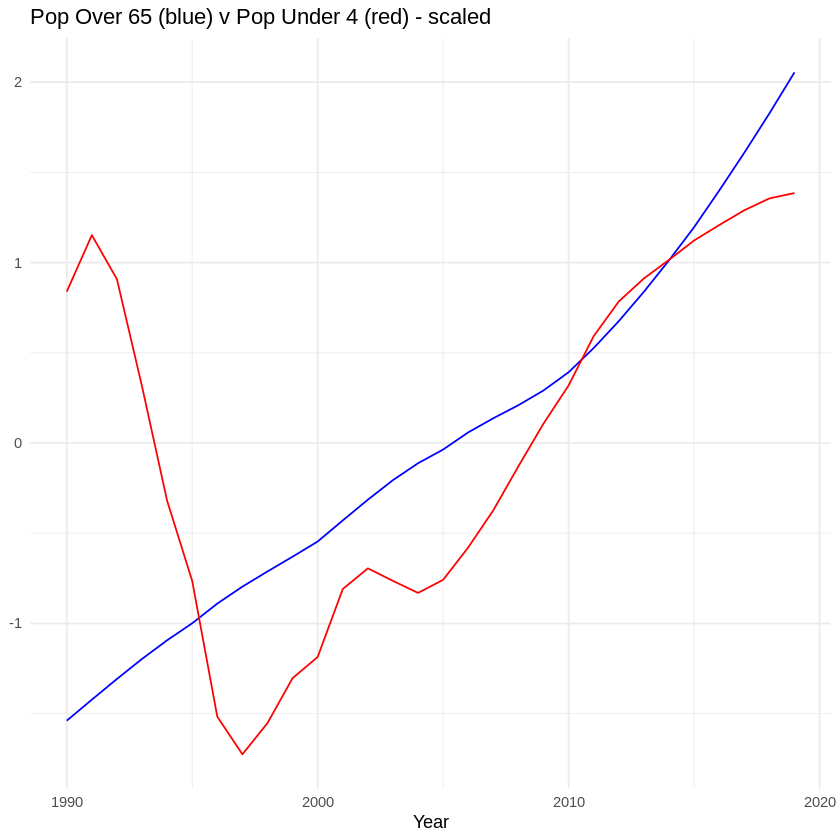

In [28]:
ggplot(popOver65, aes(x=Year, y=scale(POPOVER65))) + geom_line(color='blue') + 
        geom_line(data=popUnder4, aes(x=Year, y=scale(POPU4TOT)), color='red') + 
        ggtitle("Pop Over 65 (blue) v Pop Under 4 (red) - scaled") + theme_minimal() + 
        theme(axis.title.y=element_blank())

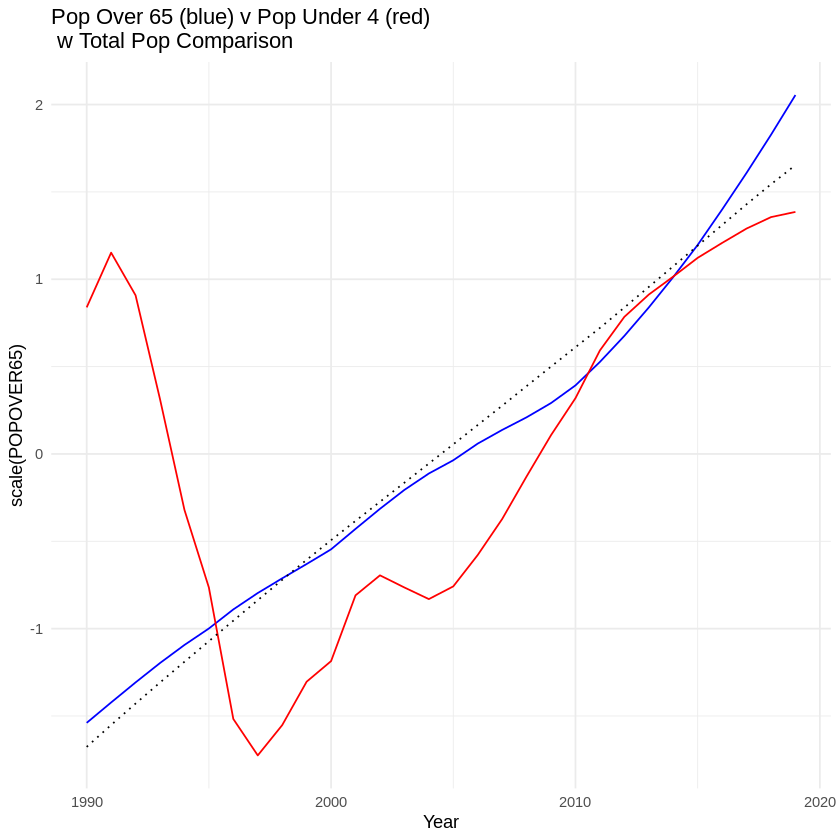

In [29]:
ggplot(popOver65, aes(x=Year, y=scale(POPOVER65))) + geom_line(color='blue') + 
        geom_line(data=popUnder4, aes(x=Year, y=scale(POPU4TOT)), color='red') + 
        ggtitle("Pop Over 65 (blue) v Pop Under 4 (red) \n w Total Pop Comparison") + 
        geom_line(data=popbyYear, aes(x=Year, y=scale(SPPOPTOTL)), linetype='dotted') + theme_minimal() 